$$X_1, ... ,X_n  \sim^{i.i.d.} Be(p)$$
$$S_n=\sum_{i}^{n} X_i (\sim \mathcal{B}(n,p))$$
$S_n$の実現値を$s$とするとき、
ベルヌーイ分布のパラメーター推定値$\hat{p}$の信頼区間の下限を求める。

**データ**:
n回施行して、s回成功した。

**求めたいもの**:
推定された成功確率$\hat{p}$の信頼区間の下限 (信頼係数1-ε)

In [1]:
from scipy.stats import f as F
import numpy as np
from typing import Union

In [2]:
def confidence_interval_left(n:Union[int,np.ndarray], #サンプル数
                             s:Union[int,np.ndarray], #成功回数
                             eps=0.1)->Union[int,np.ndarray]: #両側棄却域の大きさ
    assert type(n)==type(s)
    if not isinstance(n,int):
        acceptable = [np.int8,np.int16,np.int32,np.int64,np.uint8,np.uint16,np.uint32,np.uint64]
        assert n.dtype in acceptable and s.dtype in acceptable

    denominator=s+(n-s+1)*F.ppf(1-eps/2,dfn=2*(n-s+1), dfd=2*s)
    numerator=s
    return numerator/denominator

In [3]:
def p_hat(n:Union[int,np.ndarray],
          s:Union[int,np.ndarray]):
    return s/n

In [4]:
n=np.array([35,35,35])
s=np.array([6,1,34])

In [5]:
n.dtype

dtype('int64')

In [6]:
p_hat(n,s) #ok

array([0.17142857, 0.02857143, 0.97142857])

In [7]:
confidence_interval_left(n,s) #ok

array([0.07739442, 0.00146445, 0.87149896])

上限も求める

In [8]:
def confidence_interval_right(n:Union[int,np.ndarray], #サンプル数
                             s:Union[int,np.ndarray], #成功回数
                             eps=0.1)->Union[int,np.ndarray]: #両側棄却域の大きさ
    assert type(n)==type(s)
    if not isinstance(n,int):
        acceptable = [np.int8,np.int16,np.int32,np.int64,np.uint8,np.uint16,np.uint32,np.uint64]
        assert n.dtype in acceptable and s.dtype in acceptable

    denominator=n-s+(s+1)*F.ppf(1-eps/2, dfn=2*(s+1), dfd=2*(n-s))
    numerator=(s+1)*F.ppf(1-eps/2,dfn=2*(s+1), dfd=2*(n-s))
    return numerator/denominator

In [9]:
confidence_interval_right(n,s) #okそう

array([0.31056417, 0.12850104, 0.99853555])

In [10]:
import matplotlib.pyplot as plt

<ErrorbarContainer object of 3 artists>

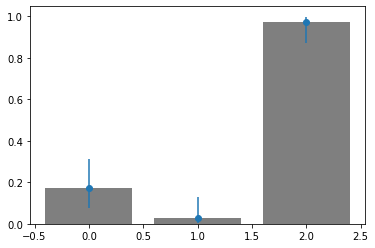

In [11]:
CTR=p_hat(n,s)
upperto=confidence_interval_right(n,s)-CTR
bottomto=CTR-confidence_interval_left(n,s)

plt.bar(list(range(3)),CTR,color='C7')
plt.errorbar(list(range(3)), 
             CTR, 
             yerr=np.vstack([bottomto,upperto]),fmt='o')

青い線は90%信頼区間の範囲